# Human Activity Recognition Using Smartphones 

Abstract: Human Activity Recognition database built from the recordings of 30 subjects performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors.

### Data Set Information:

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

###### Source: UCI Machine Learning Archive


In [290]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
#import tensorflow as tf
plt.style.use('ggplot')


In [29]:
feat_names = pd.read_csv("./UCI-HAR-Dataset/features.txt", delim_whitespace=True, names = ("code", "feature"))

In [286]:
feat_names.head()

,code,feature
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [31]:
n_feats = feat_names['feature']

In [32]:
n_feats.shape

(561,)

In [33]:
X_train = pd.read_csv('./UCI-HAR-Dataset/train/X_train.txt',  delim_whitespace=True, names=n_feats)

In [34]:
X_train.shape

(7352, 561)

In [35]:
y_train = pd.read_csv('./UCI-HAR-Dataset/train/y_train.txt',  delim_whitespace=True, header=None)

In [36]:
y_train.shape

(7352, 1)

In [150]:
X_test = pd.read_csv('./UCI-HAR-Dataset/test/X_test.txt',  delim_whitespace=True, names=n_feats)

In [151]:
X_test.shape

(2947, 561)

In [152]:
y_test = pd.read_csv('./UCI-HAR-Dataset/test/y_test.txt',  delim_whitespace=True, header=None)

In [155]:
y_test.shape

(2947, 1)

In [310]:
X_train.shape

(7352, 562)

In [293]:
X_train['activity'] = y_train

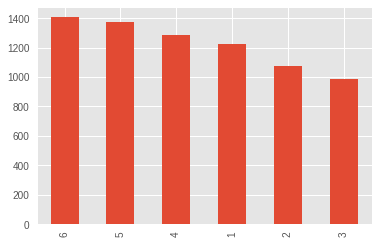

In [327]:
X_train['activity'].value_counts().plot(kind='bar')
plt.show()
#[X_train['activity'] == 5]['tBodyAcc-mean()-X'], 'x-axis')

In [38]:
scaler = StandardScaler()

In [39]:
X_train_scaled = scaler.fit_transform(X_train)

In [40]:
pca = PCA()

In [41]:
pca_X_train = pca.fit(X_train_scaled);

In [42]:
#pca_X_train.explained_variance_

In [43]:
pc1_X_trn_comp = pca_X_train.components_[0]

In [159]:
#pd.Series(pc1_X_trn_comp, index=n_feats)

In [45]:
pc2_X_trn_comp = pca_X_train.components_[1]

In [160]:
#pd.Series(pc2_X_trn_comp, index=n_feats)

In [47]:
X_train_pcs = pca.transform(X_train)
X_train_pcs = pd.DataFrame(X_train_pcs, 
                       columns=['PC'+str(i+1) for i in range(len(n_feats))],
                       index=X_train.index)
X_train_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC552,PC553,PC554,PC555,PC556,PC557,PC558,PC559,PC560,PC561
0,-18.278671,-2.715727,-2.841007,1.804179,1.837241,-0.552275,0.684671,0.315957,-1.337331,-2.168666,...,2.826900e-10,1.852750e-10,2.901968e-11,1.474022e-10,-7.293034e-11,8.876972e-13,-1.135690e-10,-3.463078e-11,4.240341e-10,3.729955e-10
1,-18.138507,-2.788490,-3.802841,2.579484,1.230851,-0.113083,0.044898,1.096611,-0.867645,-1.217605,...,2.819008e-10,1.851557e-10,2.662204e-11,1.462293e-10,-7.273138e-11,-2.175467e-12,-1.121390e-10,-3.540633e-11,4.302265e-10,3.745006e-10
2,-18.075538,-2.504969,-4.083286,2.824532,1.236006,0.108280,0.143598,1.319957,-0.788995,-1.344832,...,2.818845e-10,1.849952e-10,2.615024e-11,1.460386e-10,-7.240586e-11,-2.634903e-12,-1.117294e-10,-3.540491e-11,4.313481e-10,3.751824e-10
3,-18.193040,-2.026910,-4.122907,2.478014,0.991793,0.278533,0.241623,1.309231,-0.590607,-1.499260,...,2.815983e-10,1.853704e-10,2.551266e-11,1.457537e-10,-7.285425e-11,-3.656369e-12,-1.116235e-10,-3.587761e-11,4.335751e-10,3.750335e-10
4,-18.260398,-1.780334,-4.234365,2.579313,0.988536,0.176749,-0.100932,1.510806,-0.725468,-0.945440,...,2.815703e-10,1.851942e-10,2.565290e-11,1.456464e-10,-7.280094e-11,-3.551250e-12,-1.116470e-10,-3.584224e-11,4.327286e-10,3.747800e-10


In [145]:
exp_var = pca.explained_variance_ratio_
#exp_var

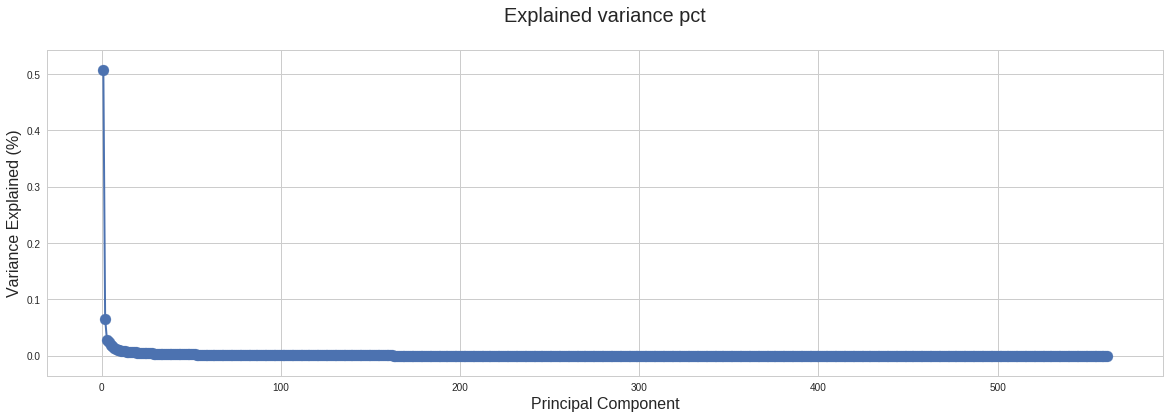

In [52]:
fig, ax = plt.subplots(figsize=(20,6))
ax.plot(range(1, len(exp_var)+1), exp_var, lw=2)
ax.scatter(range(1, len(exp_var)+1), exp_var, s=120)
ax.set_title('Explained variance pct\n', fontsize=20)
ax.set_xlabel('Principal Component', fontsize=16)
ax.set_ylabel('Variance Explained (%)', fontsize=16)
plt.show()

In [143]:
pca.explained_variance_[:5]

array([ 284.88237655,   36.9176163 ,   15.74411031,   14.0471749 ,
         10.59327893])

In [161]:
pca12 = pd.DataFrame({'PC1': pc1_X_trn_comp, 'PC2': pc2_X_trn_comp},
             index=n_feats)

In [233]:
label = ('1-WALKING', '2-WALKING.UP', '3-WALKING.DOWN', '4-SITTING', '5-STANDING', '6-LAYING')

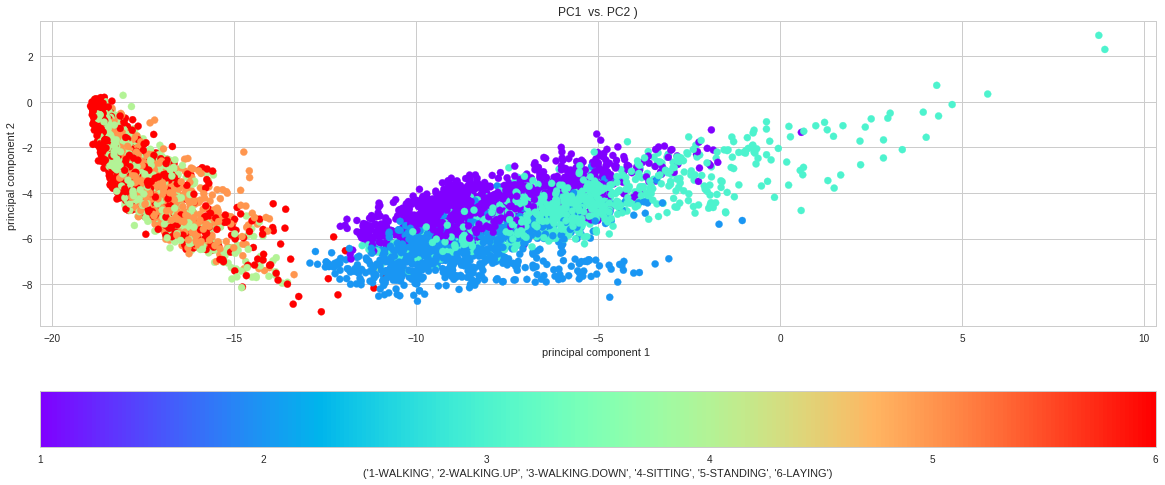

In [238]:
fig, ax = plt.subplots(figsize=(20,8))
plt.scatter(X_train_pcs.PC1.values, X_train_pcs.PC2.values, s=50 , c = (y_train), cmap=plt.cm.rainbow)
cb = plt.colorbar(orientation='horizontal')
cb.set_label(label)
plt.title('PC1  vs. PC2 )')
plt.xlabel('principal component 1 ')
plt.ylabel('principal component 2 ')
plt.show()

In [235]:
y_train.head()

,0
0,5
1,5
2,5
3,5
4,5


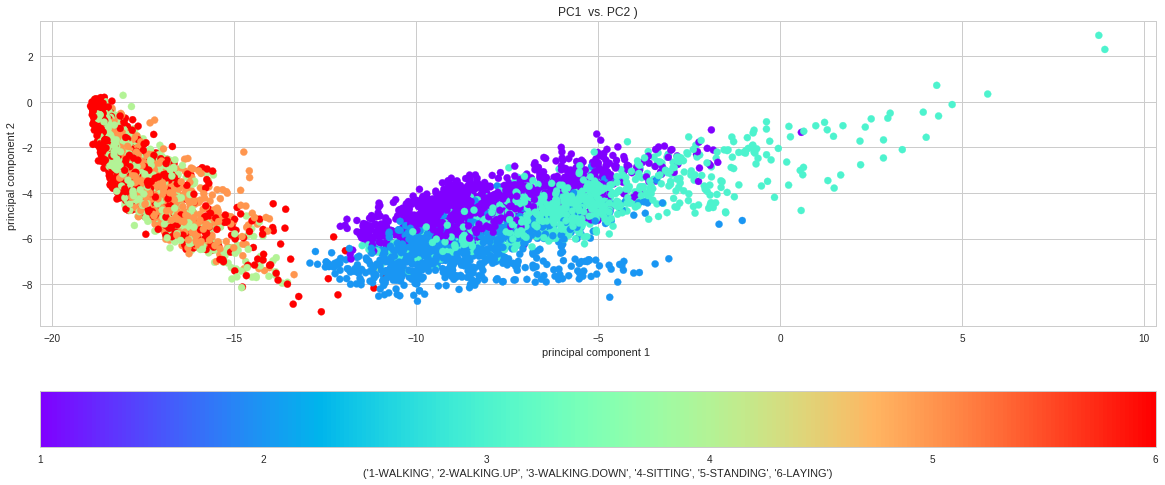

In [239]:
plt.figure(figsize=(20,8))
plt.scatter(X_train_pcs.PC1.values, X_train_pcs.PC2.values, s=50 , c = (y_train), cmap=plt.cm.rainbow)
cb = plt.colorbar(orientation='horizontal')
cb.set_label(label)
plt.title('PC1  vs. PC2 )')
plt.xlabel('principal component 1 ')
plt.ylabel('principal component 2 ')
plt.show()

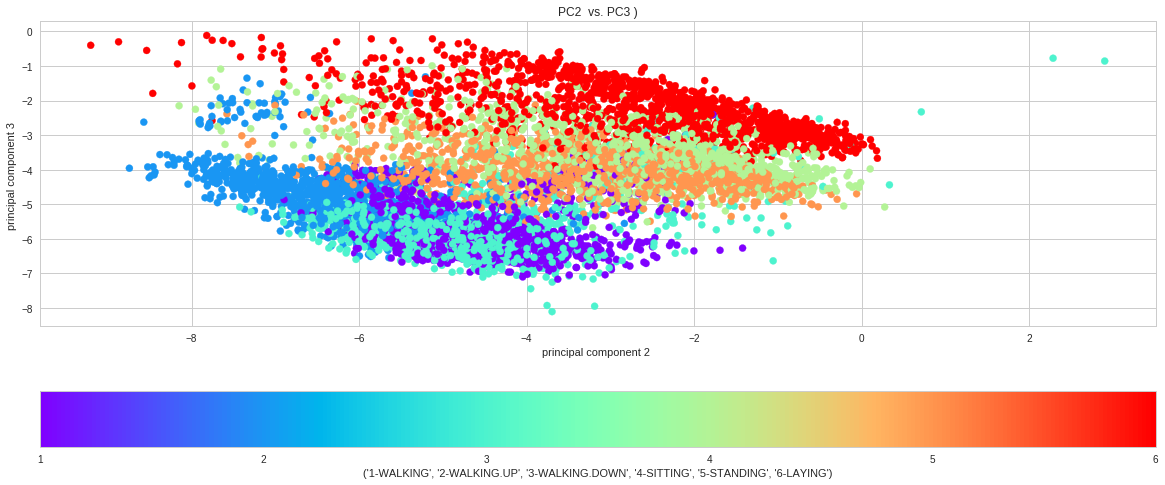

In [242]:
plt.figure(figsize=(20,8))
plt.scatter(X_train_pcs.PC2.values, X_train_pcs.PC3.values, s=50 , c = (y_train), cmap=plt.cm.rainbow)
cb = plt.colorbar(orientation='horizontal')
cb.set_label(label)
plt.title('PC2  vs. PC3 )')
plt.xlabel('principal component 2 ')
plt.ylabel('principal component 3 ')
plt.show()

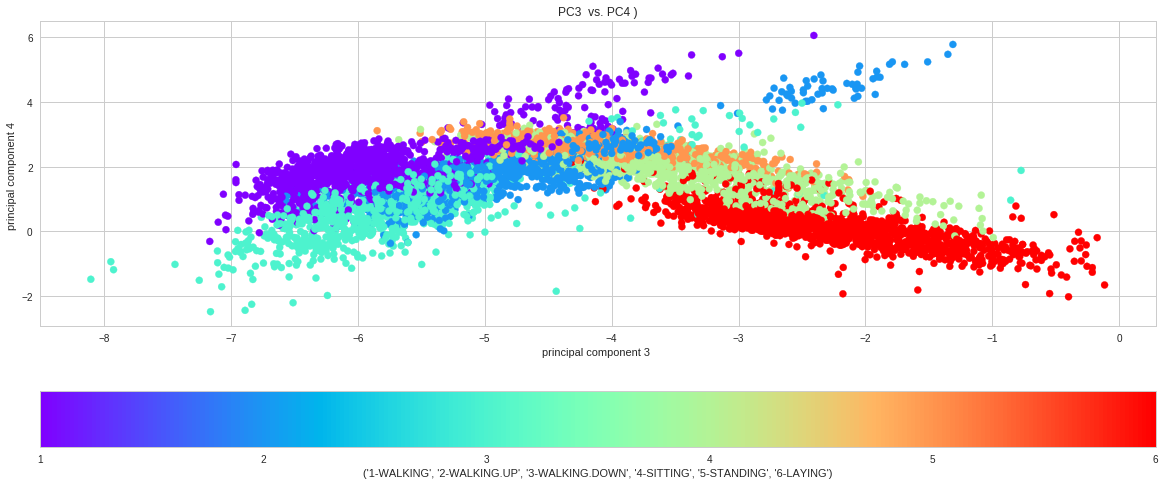

In [243]:
plt.figure(figsize=(20,8))
plt.scatter(X_train_pcs.PC3.values, X_train_pcs.PC4.values, s=50 , c = (y_train), cmap=plt.cm.rainbow)
cb = plt.colorbar(orientation='horizontal')
cb.set_label(label)
plt.title('PC3  vs. PC4 )')
plt.xlabel('principal component 3 ')
plt.ylabel('principal component 4 ')
plt.show()

In [56]:
from mpl_toolkits.mplot3d import Axes3D

In [132]:
from sklearn.decomposition import KernelPCA

In [133]:
kpca = KernelPCA(n_components=5, kernel='poly', degree=2, n_jobs=-1)

In [134]:
X_train_kpca = kpca.fit_transform(X_train)

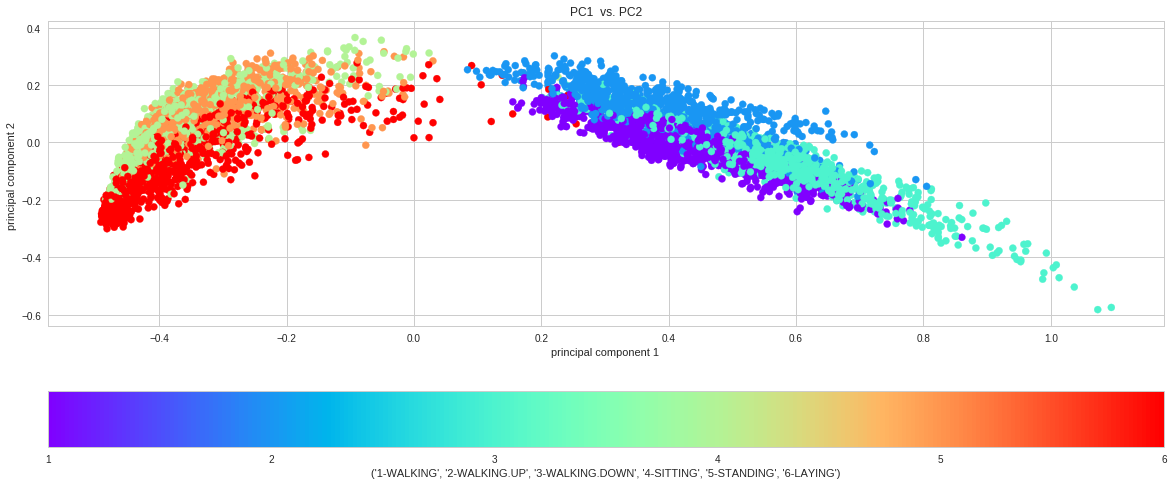

In [244]:
plt.figure(figsize=(20,8))
plt.scatter(X_train_kpca[:,0], X_train_kpca[:,1], s=50 , c = (y_train), cmap=plt.cm.rainbow)
cb = plt.colorbar(orientation='horizontal')
cb.set_label(label)
plt.title('PC1  vs. PC2')
plt.xlabel('principal component 1 ')
plt.ylabel('principal component 2 ')
plt.show()

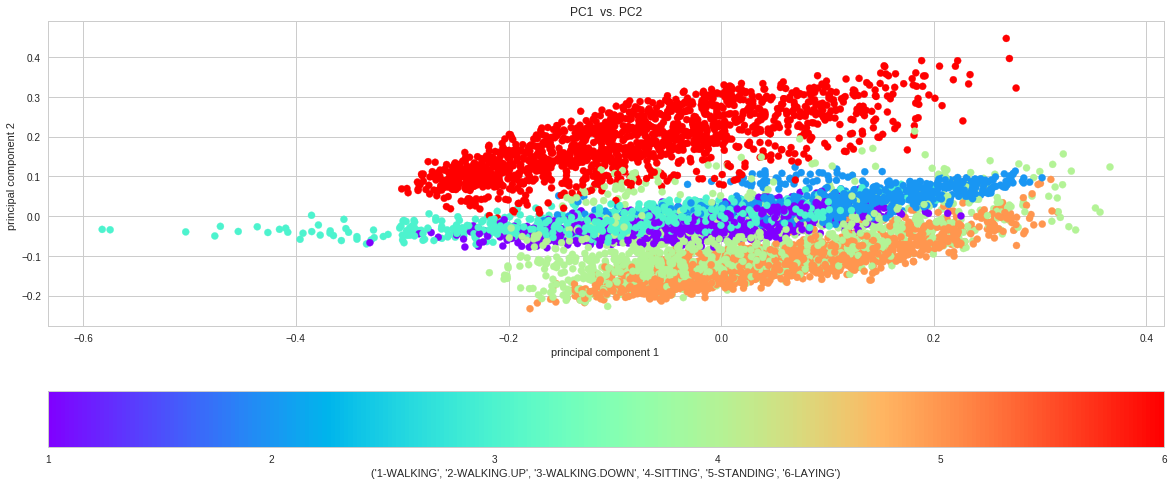

In [245]:
plt.figure(figsize=(20,8))
plt.scatter(X_train_kpca[:,1], X_train_kpca[:,2], s=50 , c = (y_train), cmap=plt.cm.rainbow)
cb = plt.colorbar(orientation='horizontal')
cb.set_label(label)
plt.title('PC1  vs. PC2')
plt.xlabel('principal component 1 ')
plt.ylabel('principal component 2 ')
plt.show()

In [140]:
kpca.lambdas_

array([ 1385.20682017,   110.35635396,    98.06239164,    41.65657134,
          33.56602265])

# Modelling

In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
logreg = LogisticRegression()

In [166]:
X_train_pcs.shape

(7352, 561)

In [246]:
from sklearn.neighbors import KNeighborsClassifier

In [247]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [258]:
X_test_pcs = pca.transform(X_test)

In [262]:
neigh.fit(X_train_pcs, y_train) 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [263]:
neigh.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')>

In [264]:
y_pred_knn = neigh.predict(X_test_pcs)

In [265]:
neigh.score(X_train_pcs, y_train)

0.99197497279651792

In [266]:
neigh.score(X_test_pcs, y_test)

0.89073634204275531

In [284]:
features = [X_train_pcs.columns]

k_range  = range(1, 31)
scores   = [] # we will capture our scores here

for k in k_range:
    knn    =  KNeighborsClassifier(n_neighbors=k)
    model  =  knn.fit(X_train_pcs, y_train)
    
    scores.append({
         'k':        k,
         'features': features,
         'train_score':    model.score(X_train_pcs, y_train),
         'test_score':    model.score(X_test_pcs, y_test)
    })
    
scores = pd.DataFrame(scores)
scores

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


,features,k,test_score,train_score
0,"[[PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9,...",1,0.878521,1.000000
1,"[[PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9,...",2,0.861215,0.988166
2,"[[PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9,...",3,0.890736,0.991975
3,"[[PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9,...",4,0.891076,0.986398
4,"[[PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9,...",5,0.901595,0.984358
5,"[[PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9,...",6,0.901256,0.984358
6,"[[PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9,...",7,0.903291,0.981774
7,"[[PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9,...",8,0.907363,0.979189
8,"[[PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9,...",9,0.905327,0.977013
9,"[[PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9,...",10,0.906685,0.976197


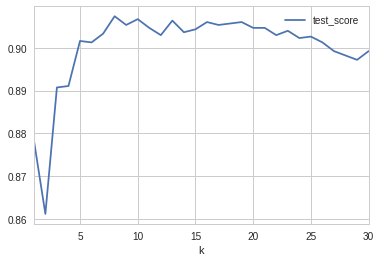

In [268]:
scores.plot(x="k", y="test_score")

## Random Forest Classifier

In [273]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train_pcs, y_train)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [274]:
clf.score(X_train_pcs, y_train)

0.99795973884657241

In [275]:
clf.score(X_test_pcs, y_test)

0.87444859178825929

In [276]:
clf_feature_importances = clf.feature_importances_

In [277]:
clf_feature_imp = list(zip(X_train_pcs, clf_feature_importances))

In [279]:
clf_feature_imp = pd.DataFrame(clf_feature_imp)
clf_feature_imp.rename(columns={1:'importance',0:'column'}, inplace=True)
clf_feature_imp = clf_feature_imp.sort(columns='importance', ascending=False)clf_feature_imp.head(20)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  This is separate from the ipykernel package so we can avoid doing imports until


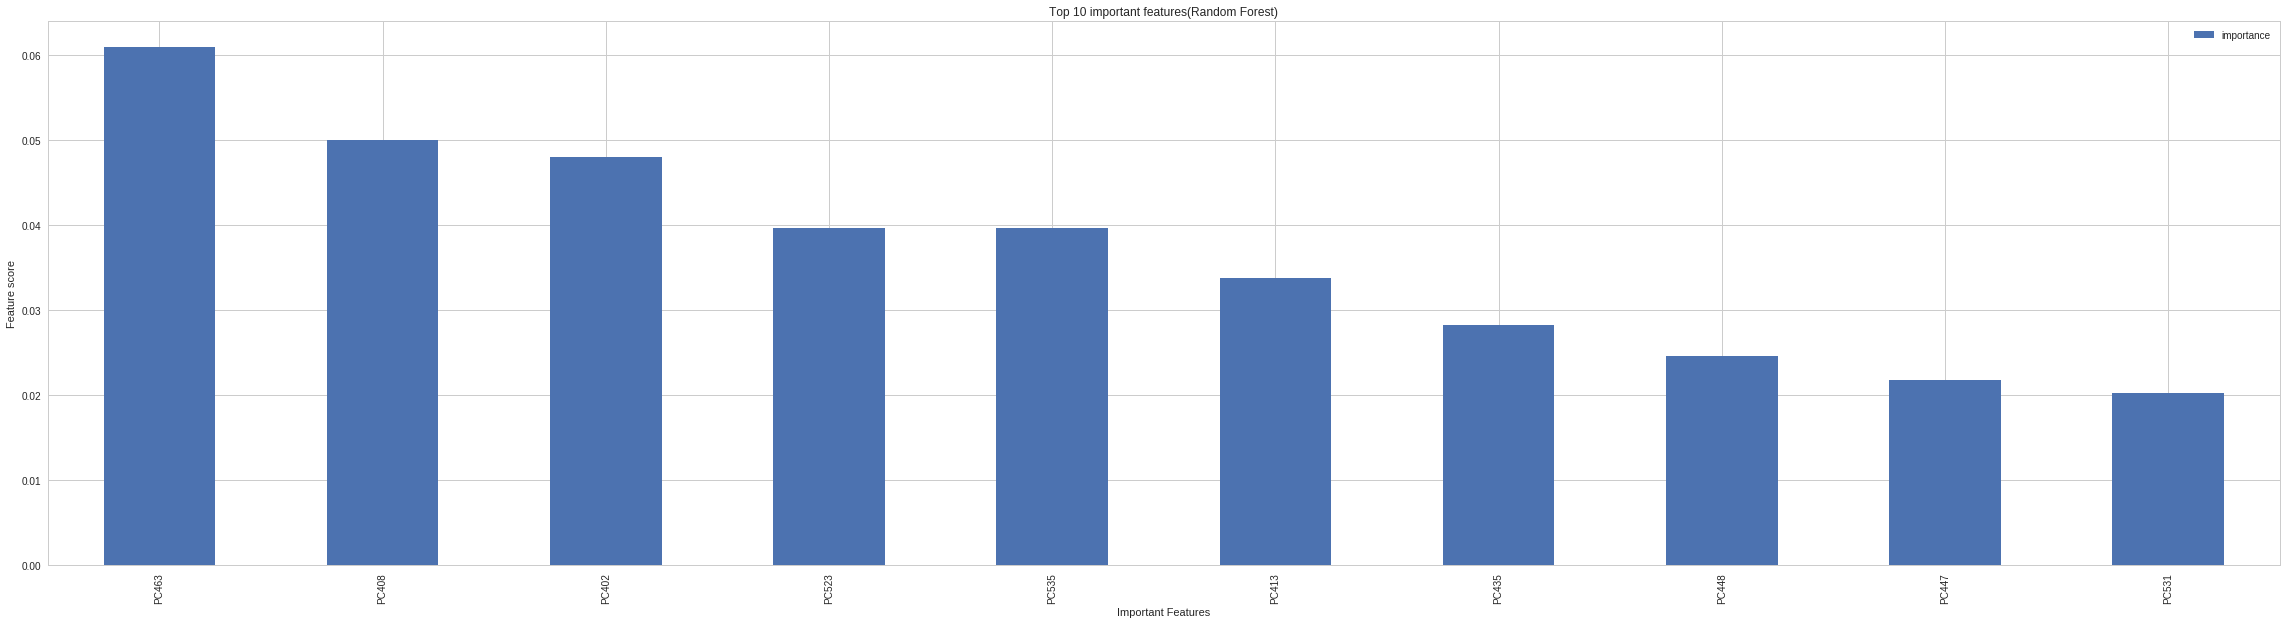

In [280]:
clf_feature_imp.head(10).plot.bar('column','importance', figsize=(40,10))
plt.title('Top 10 important features(Random Forest)')
plt.xlabel('Important Features')
plt.ylabel('Feature score')
plt.show()

In [281]:
clf_feature_imp.head(20)

,column,importance
462,PC463,0.060915
407,PC408,0.049996
401,PC402,0.047991
522,PC523,0.039625
534,PC535,0.039593
412,PC413,0.033767
434,PC435,0.028285
447,PC448,0.024525
446,PC447,0.021759
530,PC531,0.020247


In [282]:
y_pred_rf = clf.predict(X_test_pcs)

In [283]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(y_pred_rf,y_test)

array([[475,  54,  32,   0,   0,   0],
       [ 14, 404,  71,   3,   1,   0],
       [  7,  13, 317,   0,   0,   0],
       [  0,   0,   0, 407,  94,   0],
       [  0,   0,   0,  81, 437,   0],
       [  0,   0,   0,   0,   0, 537]])